In [50]:
import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [51]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, _ = loadCrabIMG("../data/Crab/15-30keV/Images")
lc1, lc1_err, lc1_date = loadCrabLC("../data/Crab/15-30keV/Lightcurves")

# ISGRI: 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2, _ = loadCrabIMG("../data/Crab/30-60keV/Images")

# JEM-X: 3 - 15 keV
cr3, vr3, sg3, xp3, acr3, avr3, cr3_cpsf, cr3_psf, err3_cpsf, err3_psf, date3, _ = loadCrabIMG("../data/Crab/3-15keV/Images")

/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:36: RuntimeWarning: invalid value encountered in scalar divide
  g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:37: RuntimeWarning: invalid value encountered in scalar divide
  
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:38: RuntimeWarning: invalid value encountered in scalar divide
  return g.ravel()
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  return g.ravel()
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:407: OptimizeWarning: 

Error processing file ../data/Crab/3-15keV/Images/233600670010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/126800730010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/116000580010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/187700070010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/178900660010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/235300630010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/268600140010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/072800220010.001mosaic.fits: array must not contain infs or NaNs
Error processing file ../data/Crab/3-15keV/Images/219400630010.001mosaic.fits: array must no

## 15 - 30 keV

Count rate light curves

In [52]:
# Parse times
img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Convert all to NumPy arrays for easier masking
cr1 = np.array(cr1)
cr1_psf = np.array(cr1_psf)
cr1_cpsf = np.array(cr1_cpsf)
vr1 = np.array(vr1)
avr1 = np.array(avr1)
lc1 = np.array(lc1)
lc1_err = np.array(lc1_err)

img_times1 = np.array(img_times1)
lc_times1 = np.array(lc_times1)

# Mask where all data are non-zero
mask_img = cr1 != 0
mask_lc = lc1 != 0

# Apply mask
cr1 = cr1[mask_img]
cr1_psf = cr1_psf[mask_img]
cr1_cpsf = cr1_cpsf[mask_img]
vr1 = vr1[mask_img]
avr1 = avr1[mask_img]
img_times1 = img_times1[mask_img]

lc1 = lc1[mask_lc]
lc1_err = lc1_err[mask_lc]
lc_times1 = lc_times1[mask_lc]


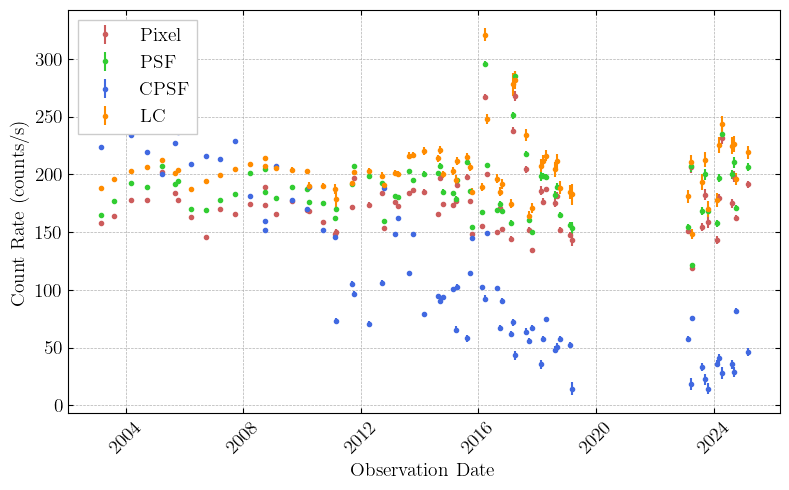

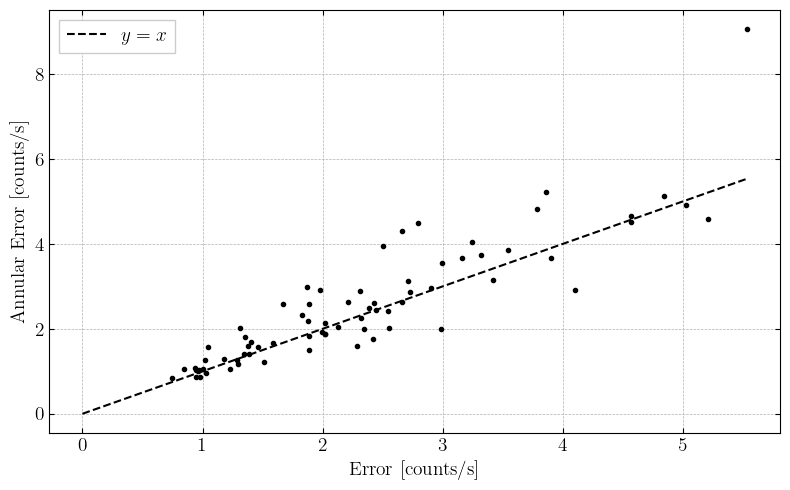

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fs = 14

# Averages and std deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)
avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# --- Count Rate vs Time Plot ---
plt.figure(figsize=(8, 5))

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color='indianred', fmt='.', capsize=0, label=r'Pixel')
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color='limegreen', fmt='.', capsize=0, label=r'PSF')
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color='royalblue', fmt='.', capsize=0, label=r'CPSF')
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color='darkorange', fmt='.', capsize=0, label=r'LC')

# Horizontal average lines
#plt.axhline(avg_cr1, color='indianred', linestyle='--')
#plt.axhline(avg_psf1, color='limegreen', linestyle='-.')
#plt.axhline(avg_cpsf1, color='royalblue', linestyle=':')
#plt.axhline(avg_lc1, color='darkorange', linestyle='-.')

plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Count Rate (counts/s)', fontsize=fs)
plt.xticks(rotation=45)

# Standardized ticks and layout
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


# --- Error vs Annular Error Plot ---
plt.figure(figsize=(8, 5))

x = np.linspace(0, np.max(np.sqrt(vr1)), 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')
plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='.', capsize=5, color='k')

plt.xlabel(r'Error [counts/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s]', fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


Offset between pixel and PSF extraction methods

Average offset between LC and pixel:  29.75369628488201


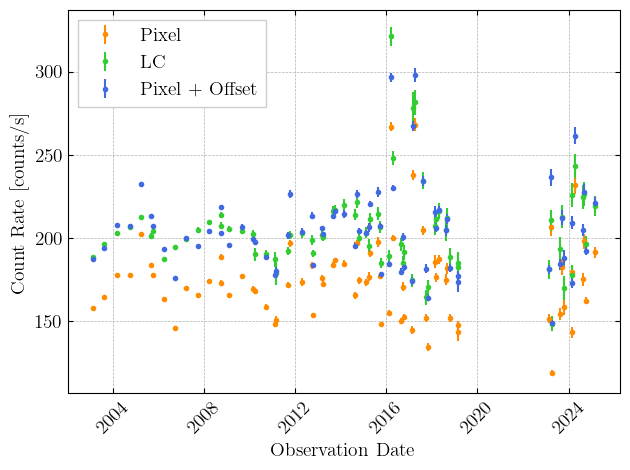

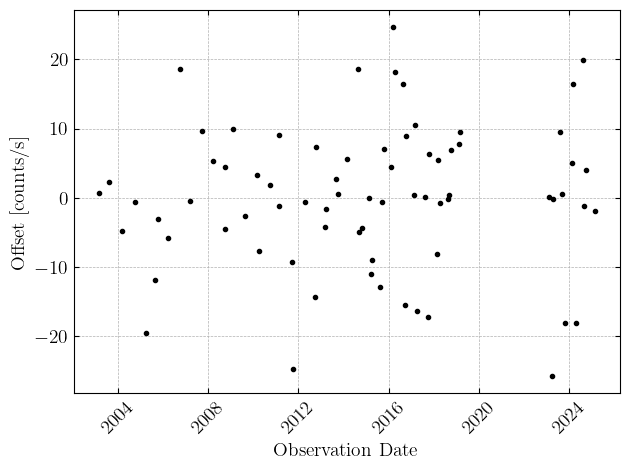

In [58]:
# Sort both time arrays along with their corresponding data arrays
sorted_img_times1, sorted_cr1, sorted_vr1 = zip(*sorted(zip(img_times1, cr1, vr1)))
sorted_lc_times1, sorted_lc1, sorted_lc1_err = zip(*sorted(zip(lc_times1, lc1, lc1_err)))

# Convert to NumPy arrays
sorted_img_times1 = np.array(sorted_img_times1)
sorted_cr1 = np.array(sorted_cr1)
sorted_vr1 = np.array(sorted_vr1)
sorted_lc_times1 = np.array(sorted_lc_times1)
sorted_lc1 = np.array(sorted_lc1)
sorted_lc1_err = np.array(sorted_lc1_err)

# Calculate offsets and mean
offsets = sorted_lc1 - sorted_cr1
avg_offset = np.mean(offsets)

print("Average offset between LC and pixel: ", avg_offset)

# First figure: count rates and offset
plt.figure()
plt.errorbar(sorted_img_times1, sorted_cr1, yerr=np.sqrt(sorted_vr1), color='darkorange', fmt='.', capsize=0, label='Pixel')
plt.errorbar(sorted_lc_times1, sorted_lc1, yerr=sorted_lc1_err, color='limegreen', fmt='.', capsize=0, label='LC')
plt.errorbar(sorted_img_times1, sorted_cr1 + avg_offset, yerr=np.sqrt(sorted_vr1), color='royalblue', fmt='.', capsize=0, label='Pixel + Offset')

plt.xlabel(r"Observation Date", fontsize=fs)
plt.ylabel(r"Count Rate [counts/s]", fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

# Second figure: offset residuals
plt.figure()
plt.errorbar(sorted_img_times1, offsets - avg_offset, color='k', fmt='.', capsize=0, label='Offset Residual')

plt.xlabel(r"Observation Date", fontsize=fs)
plt.ylabel(r"Offset [counts/s]", fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


Yearly count rate averages (not weighted)

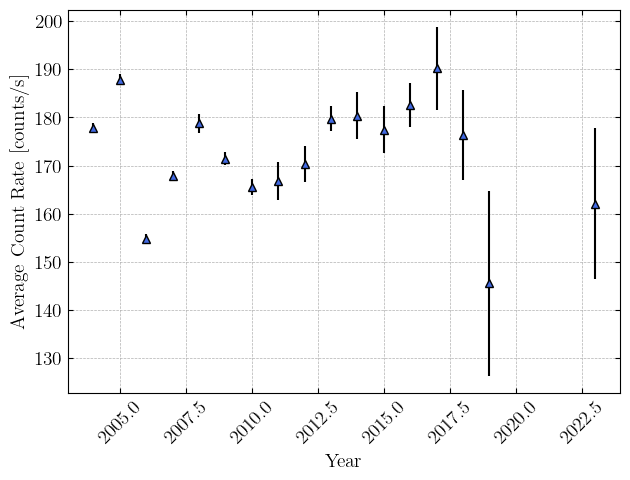

In [73]:
# Yearly averages of cr1
yearly_avg_cr1 = []
yearly_avg_vr1 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times1) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr1.append(np.mean(sorted_cr1[indices][sorted_cr1[indices] > 0]))
        yearly_avg_vr1.append(np.mean(sorted_vr1[indices][sorted_vr1[indices] > 0]))
    else:
        yearly_avg_cr1.append(np.nan)
        yearly_avg_vr1.append(np.nan)

# Plot yearly averages
plt.figure()

plt.errorbar(
    range(2004, 2024), yearly_avg_cr1, yerr=yearly_avg_vr1,
    fmt='^', capsize=0, 
    markerfacecolor='royalblue',
    markeredgecolor='k',
    ecolor='k'
)

plt.xlabel("Year", fontsize=fs)
plt.ylabel("Average Count Rate [counts/s]", fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

## 30 - 60 keV

Light curves

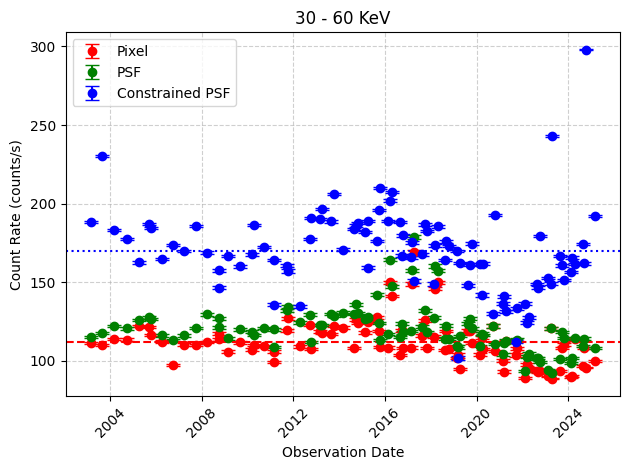

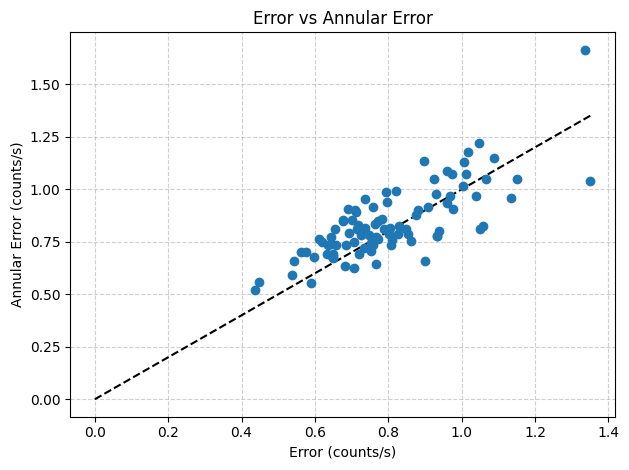

In [ ]:
img_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2]

# Calculate averages and standard deviations
avg_cr2 = np.mean(cr2)
std_cr2 = np.std(cr2)
avg_psf2 = np.mean(cr2_psf)
std_psf2 = np.std(cr2_psf)
avg_cpsf2 = np.mean(cr2_cpsf)
std_cpsf2 = np.std(cr2_cpsf)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times2, cr2, yerr=np.sqrt(vr2), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times2, cr2_psf, yerr=np.sqrt(vr2), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times2, cr2_cpsf, yerr=np.sqrt(vr2), color='b', fmt='o', capsize=5, label='Constrained PSF')

plt.axhline(avg_cr2, color='r', linestyle='--')
plt.axhline(avg_psf2, color='g', linestyle='-.')
plt.axhline(avg_cpsf2, color='b', linestyle=':')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("30 - 60 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr2)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr2), np.sqrt(avr2), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Yearl averages (not weighted)

Yearly average count rates (30 - 60 keV):
2004: 110.78 +- 0.34 counts/s
2005: 113.78 +- 0.49 counts/s
2006: 120.13 +- 0.60 counts/s
2007: 104.94 +- 0.55 counts/s
2008: 110.32 +- 0.50 counts/s
2009: 114.41 +- 0.82 counts/s
2010: 108.91 +- 0.60 counts/s
2011: 108.88 +- 0.54 counts/s
2012: 113.00 +- 0.90 counts/s
2013: 113.25 +- 0.72 counts/s
2014: 118.99 +- 0.45 counts/s
2015: 119.90 +- 0.64 counts/s
2016: 120.65 +- 0.58 counts/s
2017: 121.91 +- 0.60 counts/s
2018: 129.49 +- 0.88 counts/s
2019: 124.12 +- 0.80 counts/s
2020: 108.33 +- 0.88 counts/s
2021: 110.98 +- 0.77 counts/s
2022: 103.55 +- 1.00 counts/s
2023: 93.75 +- 0.66 counts/s


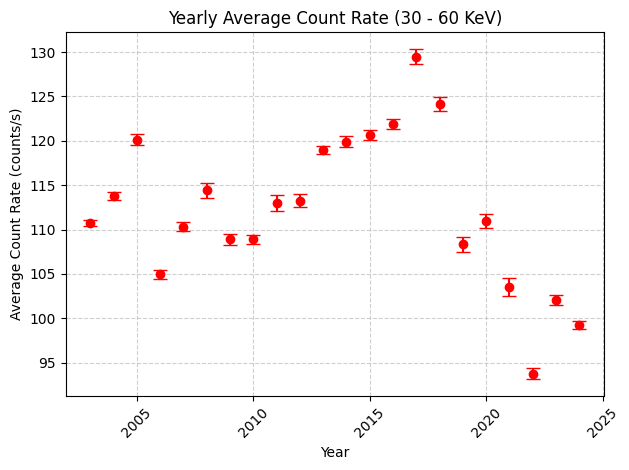

In [23]:
sorted_img_times2, sorted_cr2, sorted_vr2 = zip(*sorted(zip(img_times2, cr2, vr2)))

# Convert the sorted tuples back to arrays
sorted_img_times2 = np.array(sorted_img_times2)
sorted_cr2 = np.array(sorted_cr2)
sorted_vr2 = np.array(sorted_vr2)

# Yearly averages of cr1
yearly_avg_cr2 = []
yearly_avg_vr2 = []

# Group by year
for year in range(2003, 2025):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times2) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr2.append(np.mean(sorted_cr2[indices][sorted_cr2[indices] > 0]))
        yearly_avg_vr2.append(np.mean(sorted_vr2[indices][sorted_vr2[indices] > 0]))
    else:
        yearly_avg_cr2.append(np.nan)
        yearly_avg_vr2.append(np.nan)
# Plot yearly averages
plt.figure()
plt.errorbar(range(2003, 2025), yearly_avg_cr2, yerr=yearly_avg_vr2, fmt='o', capsize=5, color='r', label='Yearly Avg Count Rate (30 - 60 KeV)')
plt.xlabel("Year")
plt.ylabel("Average Count Rate (counts/s)")
plt.title("Yearly Average Count Rate (30 - 60 KeV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

print("Yearly average count rates (30 - 60 keV):")
for year, avg, var in zip(range(2004, 2024), yearly_avg_cr2, yearly_avg_vr2):
    print(f"{year}: {avg:.2f} +- {var:.2f} counts/s")

## 3 - 15 keV

Light curves

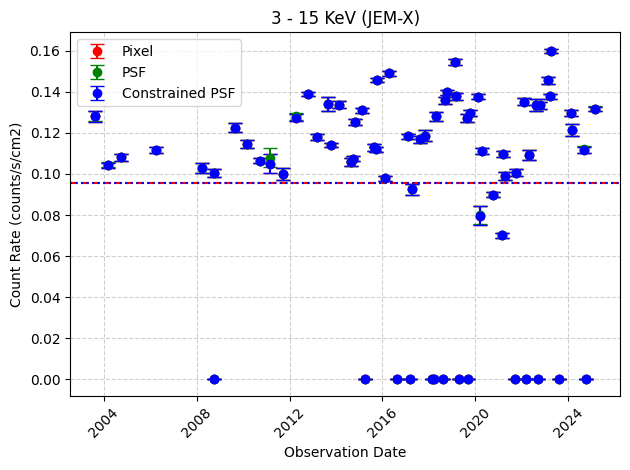

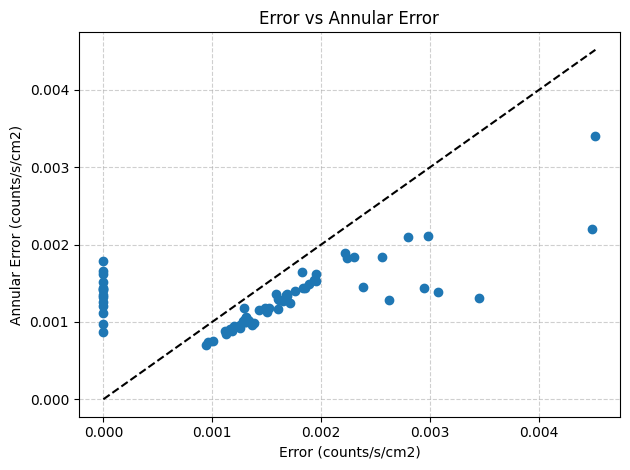

In [ ]:
img_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date3]

# Calculate averages and standard deviations
avg_cr3 = np.mean(cr3)
std_cr3 = np.std(cr3)
avg_psf3 = np.mean(cr2_psf)
std_psf3 = np.std(cr3_psf)
avg_cpsf3 = np.mean(cr3_cpsf)
std_cpsf3 = np.std(cr3_cpsf)


# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times3, cr3, yerr=np.sqrt(vr3), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times3, cr3_psf, yerr=np.sqrt(vr3), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times3, cr3_cpsf, yerr=np.sqrt(vr3), color='b', fmt='o', capsize=5, label='Constrained PSF')

plt.axhline(avg_cr3, color='r', linestyle='--')
#plt.axhline(avg_psf3, color='g', linestyle='-.')
plt.axhline(avg_cpsf3, color='b', linestyle=':')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s/cm2)")
plt.title("3 - 15 KeV (JEM-X)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr3)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr3), np.sqrt(avr3), fmt='o', capsize=5)

plt.xlabel("Error (counts/s/cm2)")
plt.ylabel("Annular Error (counts/s/cm2)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Yearly averages (not weighted)

Yearly average count rates (3 - 15 keV):
2004: 0.1062 +- 0.0000 counts/s
2005: nan +- nan counts/s
2006: 0.1117 +- 0.0000 counts/s
2007: nan +- nan counts/s
2008: 0.1016 +- 0.0000 counts/s
2009: 0.1225 +- 0.0000 counts/s
2010: 0.1105 +- 0.0000 counts/s
2011: 0.1025 +- 0.0000 counts/s
2012: 0.1330 +- 0.0000 counts/s
2013: 0.1221 +- 0.0000 counts/s
2014: 0.1181 +- 0.0000 counts/s
2015: 0.1254 +- 0.0000 counts/s
2016: 0.1235 +- 0.0000 counts/s
2017: 0.1116 +- 0.0000 counts/s
2018: 0.1345 +- 0.0000 counts/s
2019: 0.1373 +- 0.0000 counts/s
2020: 0.1046 +- 0.0000 counts/s
2021: 0.0949 +- 0.0000 counts/s
2022: 0.1279 +- 0.0000 counts/s
2023: 0.1477 +- 0.0000 counts/s


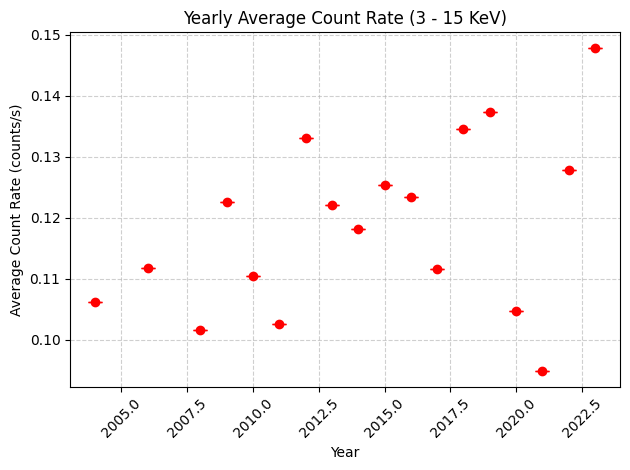

In [26]:
# Yearly averages of cr1
yearly_avg_cr3 = []
yearly_avg_vr3 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(img_times3) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr3.append(np.mean(cr3[indices][cr3[indices] > 0]))
        yearly_avg_vr3.append(np.mean(vr3[indices][vr3[indices] > 0]))
    else:
        yearly_avg_cr3.append(np.nan)
        yearly_avg_vr3.append(np.nan)
# Plot yearly averages
plt.figure()
plt.errorbar(range(2004, 2024), yearly_avg_cr3, yerr=yearly_avg_vr3, fmt='o', capsize=5, color='r', label='Yearly Avg Count Rate (3 - 15 KeV)')
plt.xlabel("Year")
plt.ylabel("Average Count Rate (counts/s)")
plt.title("Yearly Average Count Rate (3 - 15 KeV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

print("Yearly average count rates (3 - 15 keV):")
for year, avg, var in zip(range(2004, 2024), yearly_avg_cr3, yearly_avg_vr3):
    print(f"{year}: {avg:.4f} +- {var:.4f} counts/s")

## Weighted averages (all energy bands)

In [27]:
# Calculate weighted averages for 15 - 30 keV
total_15_30, yearly_15_30 = weighted_avg(date1, cr1, vr1)
total_15_30_psf, yearly_15_30_psf = weighted_avg(date1, cr1_psf, vr1)
total_15_30_cpsf, yearly_15_30_cpsf = weighted_avg(date1, cr1_cpsf, vr1)
total_15_30_lc, yearly_15_30_lc = weighted_avg(lc1_date, lc1, lc1_err)

# Calculate weighted averages for 30 - 60 keV
total_30_60, yearly_30_60 = weighted_avg(date2, cr2, vr2)
total_30_60_psf, yearly_30_60_psf = weighted_avg(date2, cr2_psf, vr2)
total_30_60_cpsf, yearly_30_60_cpsf = weighted_avg(date2, cr2_cpsf, vr2)

# Calculate weighted averages for 3 - 15 keV
total_3_15, yearly_3_15 = weighted_avg(date3, cr3, vr3)
total_3_15_psf, yearly_3_15_psf = weighted_avg(date3, cr3_psf, vr3)
total_3_15_cpsf, yearly_3_15_cpsf = weighted_avg(date3, cr3_cpsf, vr3)

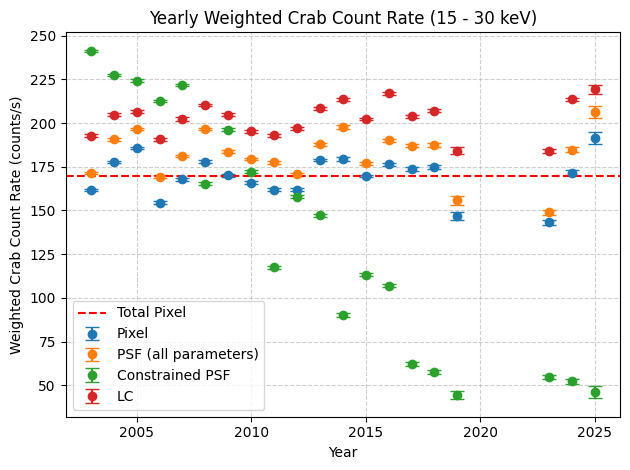

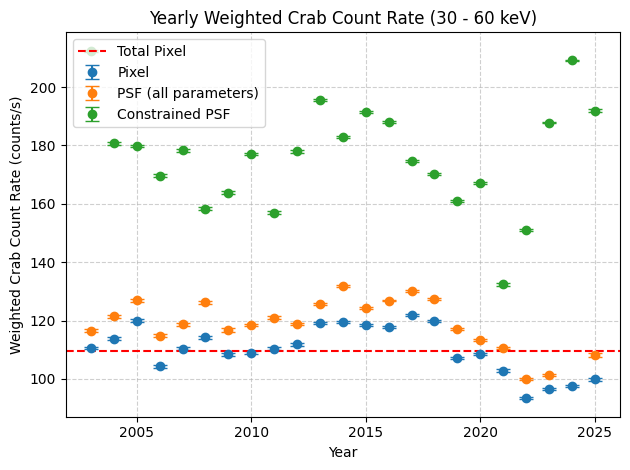

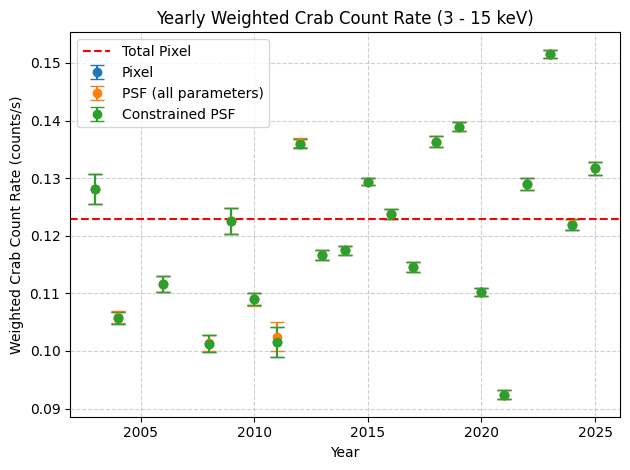

In [ ]:
# Plot for 15 - 30 keV
plt.figure()
plt.errorbar(list(yearly_15_30.keys()), 
             [result['weighted_mean'] for result in yearly_15_30.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_15_30_psf.keys()), 
             [result['weighted_mean'] for result in yearly_15_30_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_15_30_cpsf.keys()), 
             [result['weighted_mean'] for result in yearly_15_30_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(list(yearly_15_30_lc.keys()),
             [result['weighted_mean'] for result in yearly_15_30_lc.values()],
             yerr=[result['weighted_std'] for result in yearly_15_30_lc.values()],
             fmt='o', capsize=5, label='LC')

plt.axhline(total_15_30['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_15_30_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_15_30_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')
# plt.axhline(total_15_30_lc['weighted_mean'], color='c', linestyle=':', label='Total LC')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (15 - 30 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for 30 - 60 keV
plt.figure()
plt.errorbar(list(yearly_30_60.keys()), 
             [result['weighted_mean'] for result in yearly_30_60.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_30_60_psf.keys()), 
             [result['weighted_mean'] for result in yearly_30_60_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_30_60_cpsf.keys()), 
             [result['weighted_mean'] for result in yearly_30_60_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')


plt.axhline(total_30_60['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_30_60_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_30_60_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (30 - 60 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for 3 - 15 keV
plt.figure()
plt.errorbar(list(yearly_3_15.keys()), 
             [result['weighted_mean'] for result in yearly_3_15.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_3_15_psf.keys()),
             [result['weighted_mean'] for result in yearly_3_15_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_3_15_cpsf.keys()),
             [result['weighted_mean'] for result in yearly_3_15_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')

plt.axhline(total_3_15['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_3_15_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_3_15_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (3 - 15 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()